In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

file_name = "df_vector.pkl"

In [ ]:
df_vector = pd.read_pickle(file_name)
df_vector.head()

In [ ]:
categories = sorted(set(df_vector['Theme']))
i = 0
mapping = {}
for category in categories:
    mapping.update({category: i})
    i+=1

df_vector["T.Numerical"] = df_vector.Theme.map(mapping)
df_vector.head()

In [ ]:
import pickle

with open('vocabulary.pkl', 'rb') as f:
    vocabulary = pickle.load(f)

vocabulary = np.array(vocabulary)

In [ ]:
x_tmp = df_vector["FeatureVector"].to_numpy()
tmp = []
for x in x_tmp:
    tmp.append(x.reshape(1,-1))
tmp_feature_per_column = pd.DataFrame(np.concatenate(tmp), index=df_vector.index, columns=vocabulary)
tmp_feature_per_column

In [ ]:
df_vector = pd.concat([df_vector, tmp_feature_per_column], axis=1)
df_vector

# Test Train Split For Vectors
No need to standerdize the data as the vectors are standardized

In [ ]:
x_vector = df_vector.loc[:, "use":].copy()
y_vector = df_vector["T.Numerical"].copy()
x_vector.head()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_vector, y_vector, test_size=0.2, random_state=5)

Check for NaN

In [ ]:
tmp = [x_train, x_test, y_train, y_test]

for e in tmp:
    print(e.isnull().values.any())

In [ ]:
x_test.head()

In [ ]:
y_test.head()

# Linear Regression

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

In [ ]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(x_train, y_train)
coef = linear_regression.coef_
print("Coefficient:")
np.array([vocabulary, coef]).T

# Q: What does it mean in this sense the coefficient?
As I understood: I.e. If I were to increase the `use` by +1 then the predicted value for use would increase by 2.38.

## Lab: _Run a Linear classifier on the training data set, mark the mean squared error (MSE). What hypothesis can you make about this data set being linearly separable or not?_

In [ ]:
x_train_pred = linear_regression.predict(x_train)
model_error = mean_squared_error(y_train, x_train_pred)
print(f"MSE:\t{model_error:.50f}")

## A: I guess yes?
This is model is for a multiple regression with 5000 features, I guess that makes the MSE low for the training prediction.


## Lab: _How well does the linear classifier generalize to new data?_

In [ ]:
x_test_pred = linear_regression.predict(x_test)

In [ ]:
model_error = mean_squared_error(y_test, x_test_pred)
print("MSE:\t", model_error)

### A: I don't know. It's hard to interpret as this is multiple regression with 5000 features. The linear regression is in a 5000D space, and it's hard to interpret an error in this environment. I have no idea whether this is good or bad.

In [ ]:
from sklearn.metrics import r2_score

print(f"Coefficient of determination: {r2_score(y_train, x_train_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, x_test_pred)}")

# Logistic Regression

In [ ]:
log_regression = LogisticRegression(solver="lbfgs", random_state=42)
log_regression.fit(x_train, y_train)
coef = log_regression.coef_
print("Coefficient:")
coef

Coefficient:


array([[ 0.00281593,  0.06788922,  0.03250149, ...,  0.00171438,
         0.00180322,  0.00173704],
       [ 0.11841402,  0.02530355,  0.01276888, ..., -0.00149299,
         0.00193733, -0.0014704 ],
       [-0.43057165, -0.09940201, -0.0773306 , ..., -0.00304977,
        -0.00285461, -0.00299882],
       ...,
       [-0.14287325,  0.01874336, -0.18116155, ..., -0.00597523,
        -0.00560071, -0.00587704],
       [ 0.13457328, -0.07854224,  0.17583684, ..., -0.00391911,
        -0.00367004, -0.00385882],
       [ 0.7551679 ,  0.09457228,  0.02353351, ..., -0.00264088,
        -0.00248359, -0.00259875]])

# Q: How to interpret coefficients for logistics regression?

_Use Logistic regression on your training set. Then measure the error on the training set._

In [ ]:
x_train_pred = log_regression.predict(x_train)
model_error = mean_squared_error(y_train, x_train_pred)
print(f"MSE:\t{model_error:.50f}")

MSE:	13.33836477987421353930130862863734364509582519531250


## A: For Linear Regression the MSE for the training was:
0.00000000000000000000000000015125862104785390388707. Compared to that 13.33 is a lot. I assume for this reason Linear Regression was a stronger model?

## Lab: _How well does the logistic classifier generalize to new data?_

In [ ]:
x_test_pred = log_regression.predict(x_test)
model_error = mean_squared_error(y_test, x_test_pred)
print("MSE:\t", model_error)

MSE:	 13.28643216080402


The MSE was lower for unseen data which is odd. I would have expect that the MSE for the unseen data would have been higher.

In [ ]:
print(f"Coefficient of determination: {r2_score(y_train, x_train_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, x_test_pred)}")

Coefficient of determination: -0.4520322850676395
Coefficient of determination: -0.36742034409272817


# Conclusion:
* For Linear regression the model didn't perform that well. The MSE for training was: 0.00000000000000000000000000015125862104785390388707 while for the unseen test data it was: 5.735628599777146. The difference is huge.
* For Logistic regression the model did perform well. The MSE was for training was: 13.338 while for the unseen data it was: 13.2864. The difference is low.


# Dimension Reduction

## PCA
[Doc](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

Reduce dimension to 1D

In [48]:
from sklearn.decomposition import PCA

PCA_reduced_x_train = PCA(n_components=2).fit_transform(x_train)
PCA_reduced_x_test = PCA(n_components=2).fit_transform(x_test)

Linear Regression

In [49]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(PCA_reduced_x_train, y_train)

PCA_train_pred = linear_regression.predict(PCA_reduced_x_train)
model_error = mean_squared_error(y_train, PCA_train_pred)

print(f"Train MSE:\t{model_error:.50f}")

Train MSE:	7.60543917439298144955728275817818939685821533203125


In [50]:
PCA_test_pred = linear_regression.predict(PCA_reduced_x_test)
model_error = mean_squared_error(y_test, PCA_test_pred)
print("Test MSE:\t", model_error)

Test MSE:	 12.939291611720673


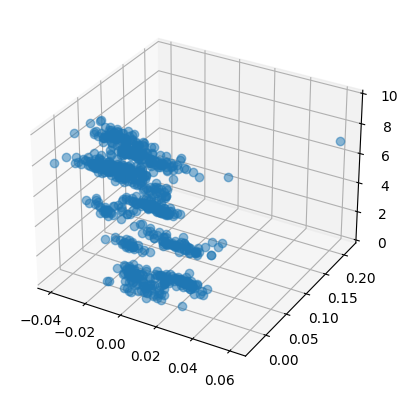

In [57]:
# Plot outputs
# ax.scatter(PCA_train_pred, y_train,  color='green')
# plt.scatter(y_test, PCA_test_pred, color='red')
plt.style.use('default')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot(PCA_reduced_x_train[:,0], PCA_reduced_x_train[:,1], y_train, zorder=15, linestyle='none', marker='o', alpha=0.5)
ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')

# plt.scatter(y_test, PCA_reduced_x_test)
# plt.plot(PCA_test_pred, PCA_reduced_x_test)
# plt.xlabel('Actual')
# plt.ylabel('Predicted')



In [ ]:
%matplotlib notebook
from IPython.core.display import HTML
from matplotlib import animation
import matplotlib.pyplot as plt

def init():
    ax.scatter(PCA_reduced_x_train[:, 0], PCA_reduced_x_train[:, 1], PCA_reduced_x_train[:, 2])
    return fig,

def animate(i):
    ax.view_init(elev=30., azim=3.6*i)
    return fig,

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_title("FeatureVector PCA Reduced to 2D")


ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=100, blit=False)
ani

## TruncatedSVD
[Doc](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html#sklearn.decomposition.TruncatedSVD)

In [ ]:
from sklearn.decomposition import TruncatedSVD
TSVD_reduced_data = TruncatedSVD(n_components=3).fit_transform(x_train)

In [ ]:
%matplotlib notebook
from IPython.core.display import HTML
from matplotlib import animation
import matplotlib.pyplot as plt

def init():
    ax.scatter(TSVD_reduced_data[:,0], TSVD_reduced_data[:,1], TSVD_reduced_data[:,2])
    return fig,

def animate(i):
    ax.view_init(elev=30., azim=3.6*i)
    return fig,

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_title("FeatureVector TruncatedSVD Reduced to 2D")


ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=100, blit=False)
ani